Давыдов ПИм-231 лаба 15 ммо

Задание 1

Какое слово написано? нноороосссоообьбтп
Напишите программный код для подсчёта количества вхождений каждой
буквы в слово и постройте гистограмму числа вхождений букв. Сделайте
подписи к рисунку и осям. В подпись к рисунку должно входить
определенное Вами слово.

In [ ]:
import collections
s = 'a word and another word'
c = collections.Counter(s)
c

Counter({'a': 3,
         ' ': 4,
         'w': 2,
         'o': 3,
         'r': 3,
         'd': 3,
         'n': 2,
         't': 1,
         'h': 1,
         'e': 1})

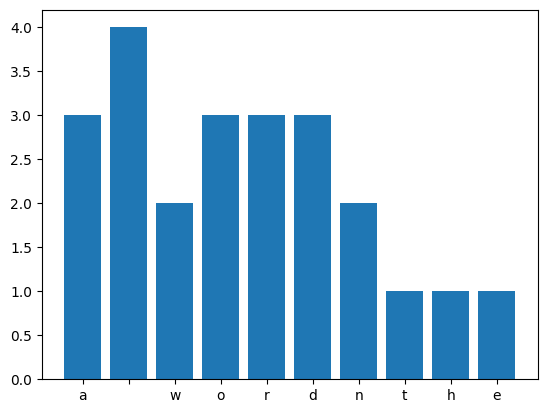

In [ ]:
import matplotlib.pyplot as plt
x = list(c.keys())
y = list(c.values())
plt.bar(x, y)
plt.show()

Задание 2

Разработайте приложение для поиска анаграмм в тексте. На входе у
приложения – текстовый файл, на выходе – списки анаграмм.


In [ ]:
import re

# Входной текст
text = """
Аз есмь строка, живу я, мерой остр.
За семь морей ростка я вижу рост.
Я в мире – сирота.
Я в Риме – Ариост.
"""

# Функция для удаления пунктуации и создания списка слов
def create_word_list(text):
    # Удаление пунктуации из текста и приведение к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Создание списка слов
    word_list = text.split()
    return word_list

# Создание списка слов из входного текста
word_list = create_word_list(text)
print(word_list)


['аз', 'есмь', 'строка', 'живу', 'я', 'мерой', 'остр', 'за', 'семь', 'морей', 'ростка', 'я', 'вижу', 'рост', 'я', 'в', 'мире', 'сирота', 'я', 'в', 'риме', 'ариост']


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Загрузка списка стоп-слов для русского языка
stop_words = set(stopwords.words('russian'))

# Функция для удаления стоп-слов из списка слов
def remove_stop_words(word_list):
    # Удаление стоп-слов из списка слов
    filtered_word_list = [word for word in word_list if word not in stop_words]
    return filtered_word_list

# Удаление стоп-слов из списка слов
filtered_word_list = remove_stop_words(word_list)
print(filtered_word_list)


['аз', 'есмь', 'строка', 'живу', 'мерой', 'остр', 'семь', 'морей', 'ростка', 'вижу', 'рост', 'мире', 'сирота', 'риме', 'ариост']


In [ ]:
# Создаем список слов
word_list = ["Аз", "есмь", "строка", "живу", "мерой", "остр", "За", "семь", "ростка", "вижу", "морей", "рост", "мире", "Риме", "сирота", "Ариост"]

# Удаление стоп-слов
filtered_word_list = remove_stop_words(word_list)

# Инициализируем список для хранения анаграмм
anagram_list = []

# Проходимся по каждому слову в списке
for word_1 in filtered_word_list:
    # Создаем список для хранения анаграмм для текущего слова
    current_anagrams = []
    # Сортируем текущее слово
    sorted_word_1 = sorted(word_1)
    # Проходимся по каждому другому слову в списке
    for word_2 in filtered_word_list:
        # Если это не одно и то же слово и его отсортированная версия равна отсортированной версии текущего слова
        if word_1 != word_2 and sorted(word_1) == sorted(word_2):
            # Добавляем его в список анаграмм для текущего слова
            current_anagrams.append(word_2)
    # Если список анаграмм для текущего слова не пустой
    if current_anagrams:
        # Добавляем его в общий список анаграмм
        anagram_list.append(current_anagrams)

# Выводим список анаграмм
for anagrams in anagram_list:
    print(anagrams)


['семь']
['ростка']
['вижу']
['морей']
['рост']
['есмь']
['строка']
['живу']
['мерой']
['остр']


Задание 3

Разработайте приложение, которое принимает на вход текстовый файл
(или просто текст) с обычным текстом и выводит этот же текст, но с
перемешанными буквами внутри слов. Первая и последняя буквы каждого
слова должны остаться на своих местах.

In [ ]:
import random

def shuffle_word(word):
    # Если слово короче или равно 3 символам, просто вернем его, так как первая и последняя буквы останутся на месте
    if len(word) <= 3:
        return word
    else:
        # Перемешиваем все символы в слове, кроме первого и последнего
        middle_part = list(word[1:-1])
        random.shuffle(middle_part)
        # Собираем слово заново
        shuffled_word = word[0] + ''.join(middle_part) + word[-1]
        return shuffled_word

def shuffle_text(text):
    # Разбиваем текст на слова
    words = text.split()
    # Перемешиваем каждое слово
    shuffled_words = [shuffle_word(word) for word in words]
    # Собираем перемешанный текст из перемешанных слов
    shuffled_text = ' '.join(shuffled_words)
    return shuffled_text

# Входной текст
input_text = "По результатам исследований одного английского университета, не имеет значения, в каком порядке расположены буквы в слове. Главное, чтобы первая и последняя буквы были на месте. Остальные буквы могут следовать в полном беспорядке, все равно текст читается без проблем. Причиной этого является то, что мы не читаем каждую букву по отдельности, а все слово целиком."

# Получаем перемешанный текст
shuffled_text = shuffle_text(input_text)

# Выводим перемешанный текст
print(shuffled_text)


По рзтауьалтем иссдлонаевий оногдо аснйиглкого увиренстеати, не иемет зчняеиан, в ккаом проякде рноеспожлаы бвкуы в слвео. Гвлоаен, чботы паверя и пнсодяеля бквуы блыи на меест. Оытьансле бувкы моугт сдлаоветь в пнлоом бяоееспкрд, все рнвао ткест четтисая без пмлобер. Прииочнй эгото ялетявся то, что мы не четиам куджаю бвуку по отсднитлеоь, а все совло цеколим.
